자연어 처리는 일반적으로 토큰화, 단어 집합 생성, 정수 인코딩, 패딩, 벡터화 등의 과정이 필요

### 토큰화(Tokenization)

In [28]:
en_text = "A Dog Run back corner near spare bedrooms"

In [29]:
# NLTK 를 이용한 토큰화

import nltk
from nltk.tokenize import word_tokenize

print(word_tokenize(en_text))

# 띄어쓰기로 토큰화
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']
['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [30]:
# 문자 토큰화
print(list(en_text))

['A', ' ', 'D', 'o', 'g', ' ', 'R', 'u', 'n', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'o', 'r', 'n', 'e', 'r', ' ', 'n', 'e', 'a', 'r', ' ', 's', 'p', 'a', 'r', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', 's']


In [31]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"

In [32]:
# 조사가 붙어 같은 단어여도 다른 단어로 인식될 수 있음
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


In [33]:
# 형태소 토큰화
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이라는', '글', '을', '봤어', '.', '그래서', '오늘', '사과', '를', '먹으려고', '했는데', '사과', '가', '썩어서', '슈퍼', '에', '가서', '사과', '랑', '오렌지', '사왔어']


### 단어 집합(Vocabulary) 생성

`단어 집합(vocabuary)`이란 중복을 제거한 텍스트의 총 단어의 집합(set)을 의미

In [34]:
import urllib.request
import pandas as pd
from konlpy.tag import Okt
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# 네이버 영화 리뷰 분류 데이터셋
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [36]:
print('전체 샘플의 수 : ', len(data))

전체 샘플의 수 :  200000


In [37]:
sample_data = data[:100] # 임의로 100개만 저장

In [38]:
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
sample_data[:10]

C:\Users\admin\AppData\Local\Temp\ipykernel_21084\2699575776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [39]:
# 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [40]:
# 형태소 토큰화
tokenizer = Okt()
tokenized=[]

for sentence in sample_data['document']:
    temp = tokenizer.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)
    
print(tokenized[:10])

[['어릴', '때', '보고', '지금', '다시', '봐도', '재밌어요', 'ㅋㅋ'], ['디자인', '을', '배우는', '학생', ',', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해가는', '문화', '산업', '부러웠는데', '.', '사실', '우리나라', '에서도', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같은', '전통', '있어', '저', '같은', '사람', '꿈', '을', '꾸고', '이뤄', '나갈', '수', '있다는', '것', '감사합니다', '.'], ['폴리스스토리', '시리즈', '1', '부터', '뉴', '까지', '버릴께', '하나', '없음', '..', '최고', '.'], ['..', '연기', '진짜', '개', '쩔구나', '..', '지루할거라고', '생각', '했는데', '몰입', '해서', '봤다', '..', '그래', '이런게', '진짜', '영화', '지'], ['안개', '자욱한', '밤하늘', '떠', '있는', '초승달', '같은', '영화', '.'], ['사랑', '을', '해본', '사람', '라면', '처음', '부터', '끝', '까지', '웃을수', '있는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '2', '나오나요', '?', '나오면', '1', '빠', '로', '보고', '싶음'], ['굿'], ['바보', '아니라', '병', '쉰', '인듯']]


In [41]:
# 빈도 수 계산
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 :', len(vocab))

단어 집합의 크기 : 797


In [42]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : ', len(vocab))

단어 집합의 크기 :  500


### 각 단어에 고유한 정수 부여

In [43]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [45]:
encoded = []
for line in tokenized: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
        try:
            temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
        except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
            temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

print(encoded[:10])

[[51, 14, 41, 28, 29, 52, 159, 30], [160, 4, 161, 162, 6, 163, 164, 15, 165, 82, 4, 166, 167, 168, 83, 169, 170, 2, 42, 84, 85, 15, 171, 172, 86, 20, 173, 4, 174, 175, 31, 82, 176, 32, 31, 21, 177, 4, 178, 179, 180, 33, 181, 53, 182, 2], [183, 184, 54, 34, 185, 20, 186, 87, 88, 5, 7, 2], [5, 22, 16, 89, 187, 5, 188, 17, 55, 189, 90, 91, 5, 190, 191, 16, 3, 92], [192, 193, 194, 195, 93, 196, 31, 3, 2], [94, 4, 197, 21, 95, 96, 34, 86, 20, 198, 93, 3], [97, 18, 199, 29, 52, 18], [89, 200, 98, 201, 11, 202, 54, 203, 23, 41, 204], [99], [205, 206, 207, 208, 209]]


길이가 다른 문장들을 모두 동일한 길이로 바꿔주는 패딩(padding)

리뷰의 최대 길이 : 50
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 12.700000


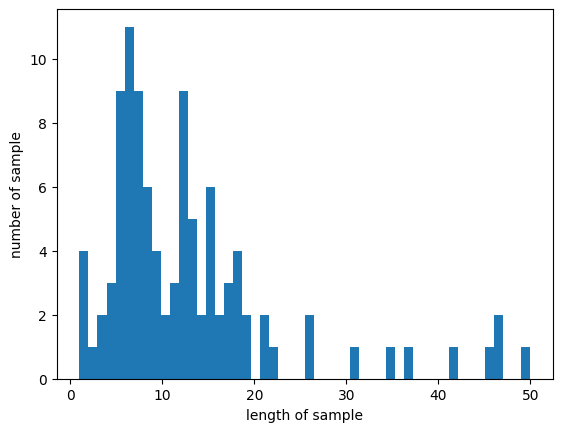

In [46]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [47]:
# 가장 긴 리뷰의 길이로 통일
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

In [48]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 50
리뷰의 최소 길이 : 50
리뷰의 평균 길이 : 50.000000


In [51]:
print(encoded[0])

[51, 14, 41, 28, 29, 52, 159, 30, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
